<a href="https://colab.research.google.com/github/ManuMartinDeveloper/Lab_Projects/blob/main/Final_project_aml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/mental_health.csv')
df.head()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)


Age                        0
Gender                     0
Occupation                 0
Days_Indoors               0
Growing_Stress             0
Quarantine_Frustrations    0
Changes_Habits             0
Mental_Health_History      0
Weight_Change              0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
dtype: int64


In [ ]:
# configs
pd.set_option('display.max_columns', None) # we want to display all columns in this notebook

# aesthetics
default_color_1 = 'darkblue'
default_color_2 = 'darkgreen'
default_color_3 = 'darkred'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      824 non-null    object
 1   Gender                   824 non-null    object
 2   Occupation               824 non-null    object
 3   Days_Indoors             824 non-null    object
 4   Growing_Stress           824 non-null    object
 5   Quarantine_Frustrations  824 non-null    object
 6   Changes_Habits           824 non-null    object
 7   Mental_Health_History    824 non-null    object
 8   Weight_Change            824 non-null    object
 9   Mood_Swings              824 non-null    object
 10  Coping_Struggles         824 non-null    object
 11  Work_Interest            824 non-null    object
 12  Social_Weakness          824 non-null    object
dtypes: object(13)
memory usage: 83.8+ KB


In [ ]:
# numerical features
features_num = []

# categorical features
features_cat = ['Age', 'Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress',
       'Quarantine_Frustrations', 'Changes_Habits', 'Mental_Health_History',
       'Weight_Change', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest',
       'Social_Weakness']

# all features combined
features = features_num + features_cat

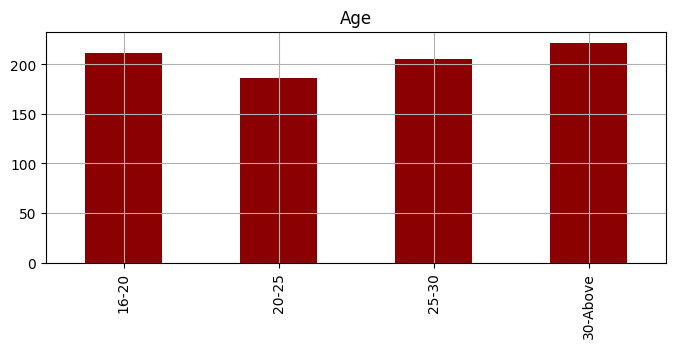

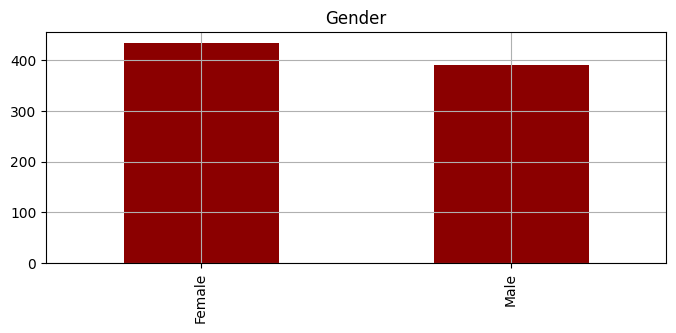

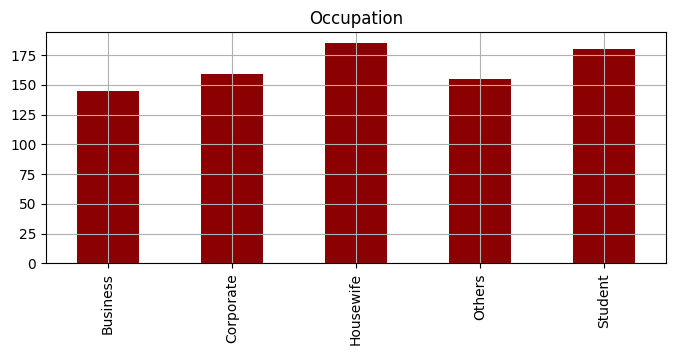

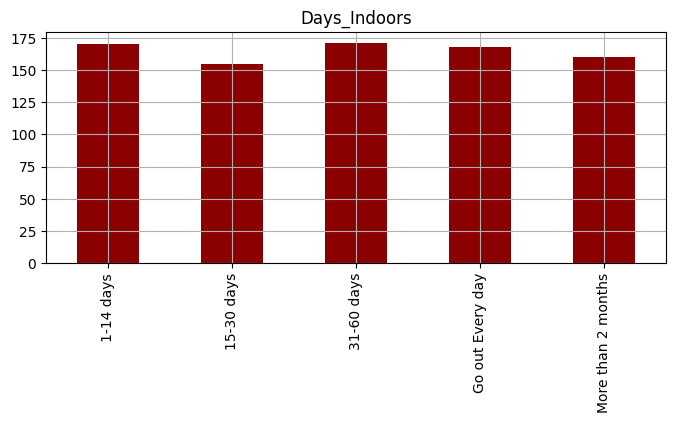

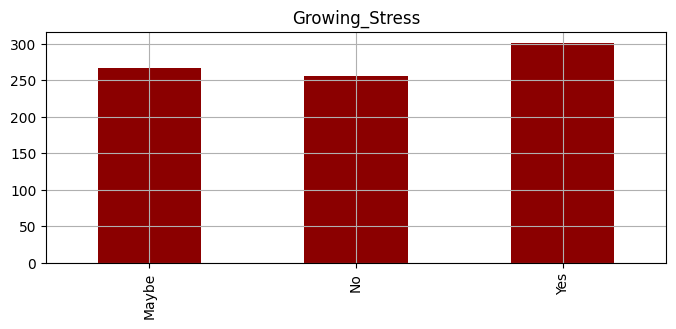

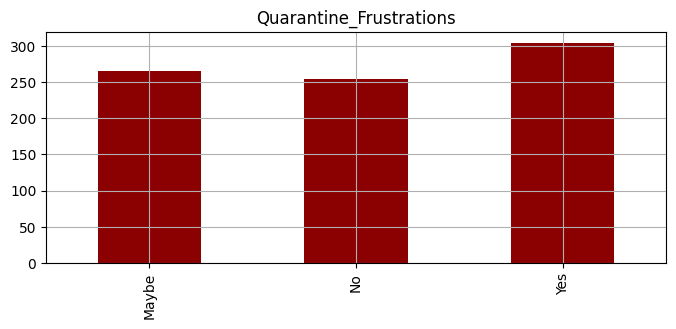

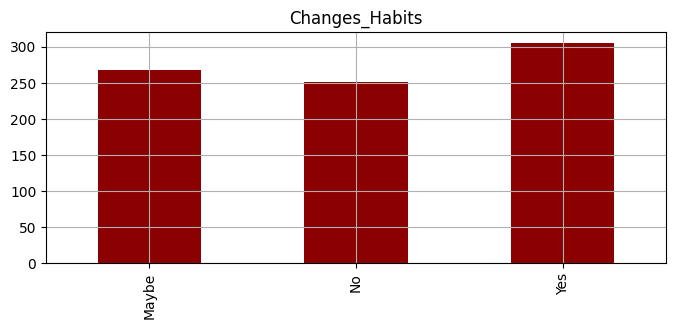

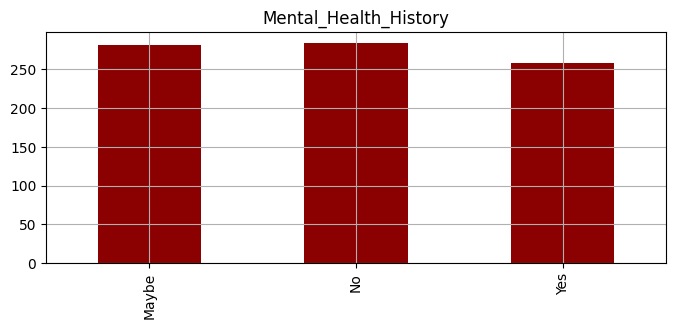

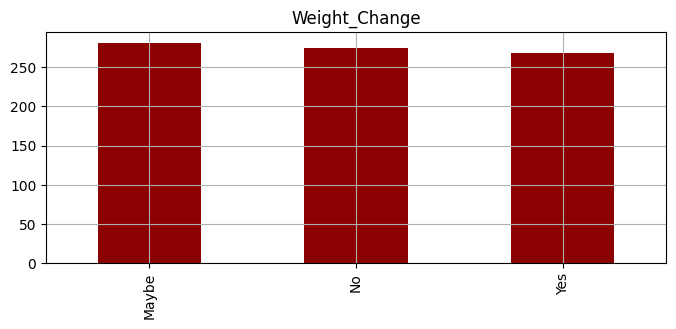

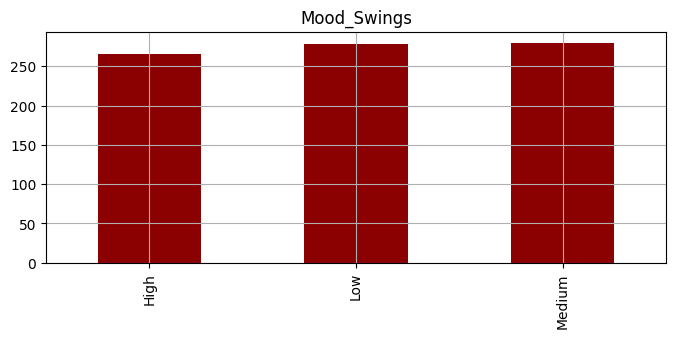

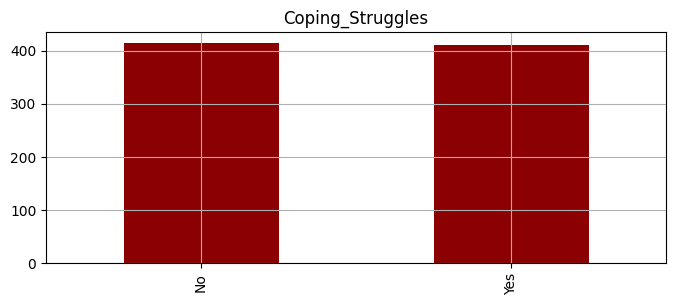

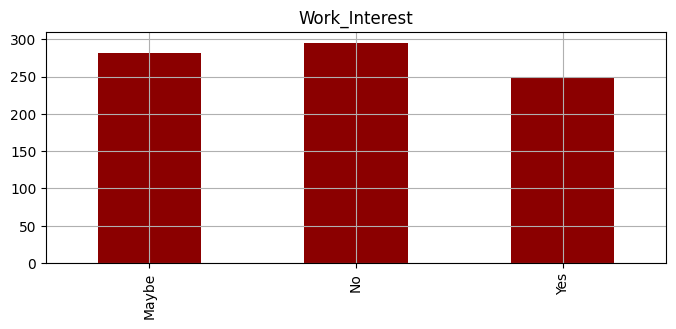

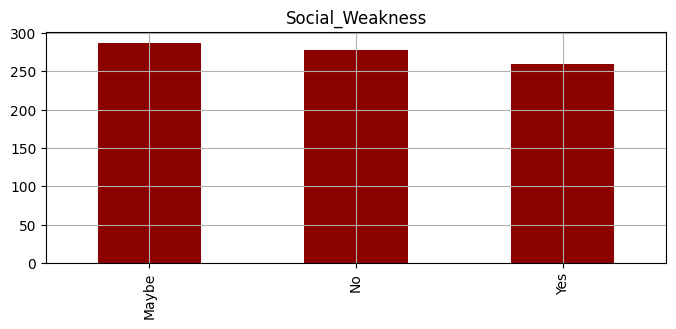

In [ ]:
# plot categorical feature distributions (train and test)
for f in features_cat:
    plt.figure(figsize=(8,3))
    df[f].value_counts().sort_index().plot(kind='bar', color=default_color_3)
    plt.title(f)
    plt.grid()
    plt.show()

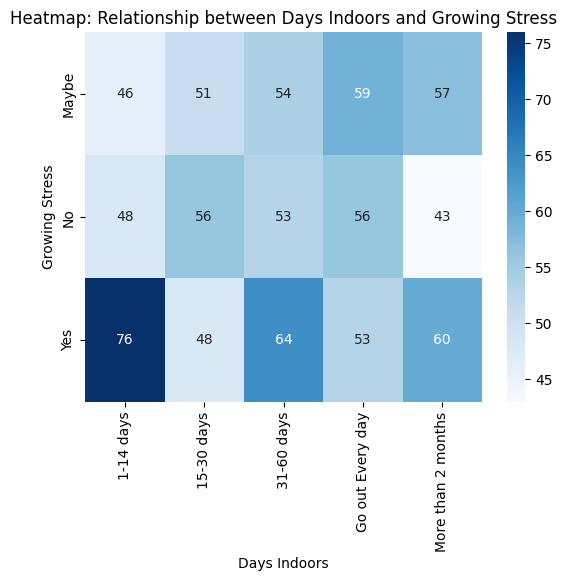

In [ ]:
# Scatter plot for 'Days_Indoors' vs 'Growing_Stress'
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.heatmap(df[['Days_Indoors', 'Growing_Stress']].pivot_table(index='Growing_Stress', columns='Days_Indoors', aggfunc='size'), cmap='Blues', annot=True, fmt='g')
plt.xlabel('Days Indoors')
plt.ylabel('Growing Stress')
plt.title('Heatmap: Relationship between Days Indoors and Growing Stress')
plt.show()


In [ ]:
# Count the occurrences of each occupation
occupation_counts = df['Occupation'].value_counts()
most_common_occupation = occupation_counts.idxmax()

most_common_occupation, occupation_counts

('Housewife',
 Housewife    185
 Student      180
 Corporate    159
 Others       155
 Business     145
 Name: Occupation, dtype: int64)

In [ ]:
import plotly.express as px

# Pie chart for Mental Health History distribution
mental_health_history_counts = df['Mental_Health_History'].value_counts()

fig = px.pie(mental_health_history_counts, names=mental_health_history_counts.index, title='Distribution of Mental Health History')
fig.show()

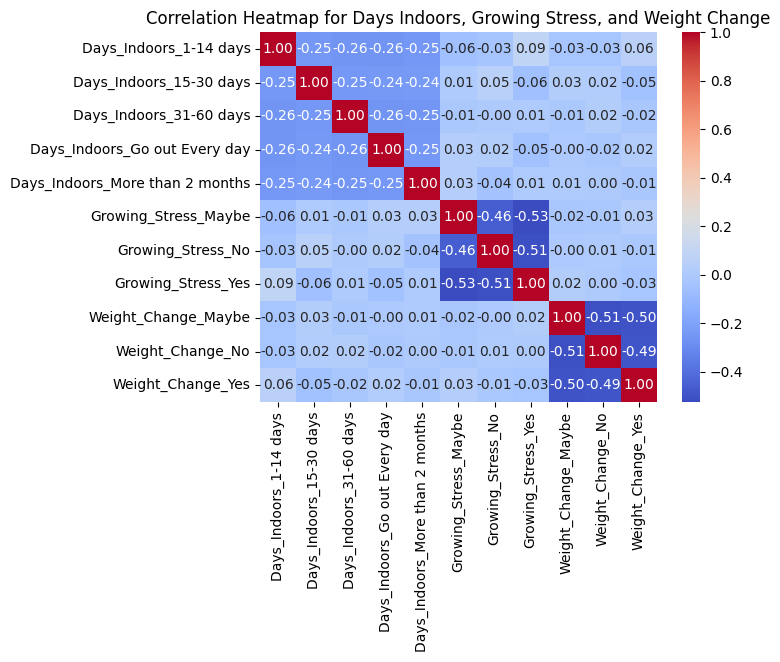

In [ ]:
# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df[['Days_Indoors', 'Growing_Stress', 'Weight_Change']])

# Calculate and visualize the correlation matrix
subset_correlation_matrix = df_encoded.corr()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Days Indoors, Growing Stress, and Weight Change')
plt.show()

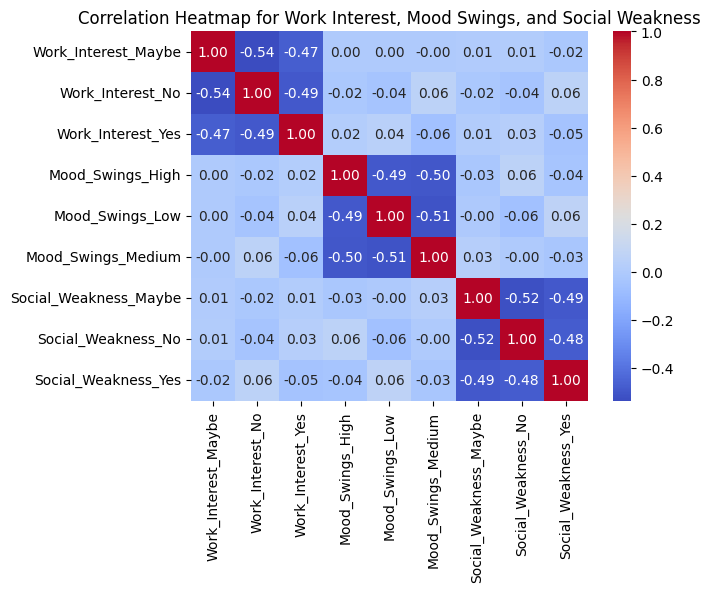

In [ ]:
# Convert categorical columns to numerical using one-hot encoding
df_encoded_subset = pd.get_dummies(df[['Work_Interest', 'Mood_Swings', 'Social_Weakness']])

# Calculate and visualize the correlation matrix
subset_correlation_matrix_2 = df_encoded_subset.corr()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(subset_correlation_matrix_2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Work Interest, Mood Swings, and Social Weakness')
plt.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df)

# Calculate the correlation matrix
correlation_matrix_encoded = df_encoded.corr()

# Create a heatmap trace
heatmap_trace_encoded = go.Heatmap(z=correlation_matrix_encoded.values,
                                   x=correlation_matrix_encoded.columns,
                                   y=correlation_matrix_encoded.index,
                                   colorscale='viridis',  # Change the colorscale to a valid option
                                   colorbar=dict(title='Correlation', tickformat=".2f"))

# Create the layout for the heatmap
layout_encoded = go.Layout(title='Correlation Heatmap for the Entire Dataset (Encoded)')

# Create the figure
fig_encoded = go.Figure(data=[heatmap_trace_encoded], layout=layout_encoded)

# Show the figure
fig_encoded.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming your dataset is stored in a DataFrame named 'df'
# Select 10 columns for label encoding
columns_to_encode = ['Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress', 'Quarantine_Frustrations', 'Mood_Swings', 'Social_Weakness',
                     'Changes_Habits', 'Mental_Health_History', 'Weight_Change', 'Coping_Struggles', 'Work_Interest']

# Create a label encoder instance
label_encoder = LabelEncoder()

# Create a dictionary to store the mapping of labels to numeric values
label_mapping = {}

# Apply label encoding to each selected column and store the mapping
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
    label_mapping[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the label mapping
for column, mapping in label_mapping.items():
    print(f"{column} Label Mapping:")
    for label, numeric_value in mapping.items():
        print(f"  {label}: {numeric_value}")

# Now, your selected columns have been label encoded in the original DataFrame 'df'


Gender Label Mapping:
  Female: 0
  Male: 1
Occupation Label Mapping:
  Business: 0
  Corporate: 1
  Housewife: 2
  Others: 3
  Student: 4
Days_Indoors Label Mapping:
  1-14 days: 0
  15-30 days: 1
  31-60 days: 2
  Go out Every day: 3
  More than 2 months: 4
Growing_Stress Label Mapping:
  Maybe: 0
  No: 1
  Yes: 2
Quarantine_Frustrations Label Mapping:
  Maybe: 0
  No: 1
  Yes: 2
Mood_Swings Label Mapping:
  High: 0
  Low: 1
  Medium: 2
Social_Weakness Label Mapping:
  Maybe: 0
  No: 1
  Yes: 2
Changes_Habits Label Mapping:
  Maybe: 0
  No: 1
  Yes: 2
Mental_Health_History Label Mapping:
  Maybe: 0
  No: 1
  Yes: 2
Weight_Change Label Mapping:
  Maybe: 0
  No: 1
  Yes: 2
Coping_Struggles Label Mapping:
  No: 0
  Yes: 1
Work_Interest Label Mapping:
  Maybe: 0
  No: 1
  Yes: 2


In [ ]:
df.head()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,0,1,0,2,2,1,2,2,2,0,1,2
1,30-Above,1,3,2,2,2,0,1,1,0,0,1,2
2,30-Above,0,4,3,1,1,2,1,1,2,1,0,1
3,25-30,1,3,0,2,1,0,1,0,2,0,0,2
4,16-20,0,4,4,2,2,2,1,2,2,1,0,1


In [ ]:
df1 = df

##EDA


In [ ]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Calculate Z-scores for each numerical feature
z_scores = np.abs((numerical_features - numerical_features.mean()) / numerical_features.std())

# Define a threshold for considering a data point as an outlier (Z-score > 3)
outlier_threshold = 3

# Identify and filter out outliers
outliers = (z_scores > outlier_threshold).any(axis=1)
df_no_outliers = df[~outliers]

# Display the number of rows before and after removing outliers
print(f"Number of rows before removing outliers: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_no_outliers)}")

Number of rows before removing outliers: 824
Number of rows after removing outliers: 824


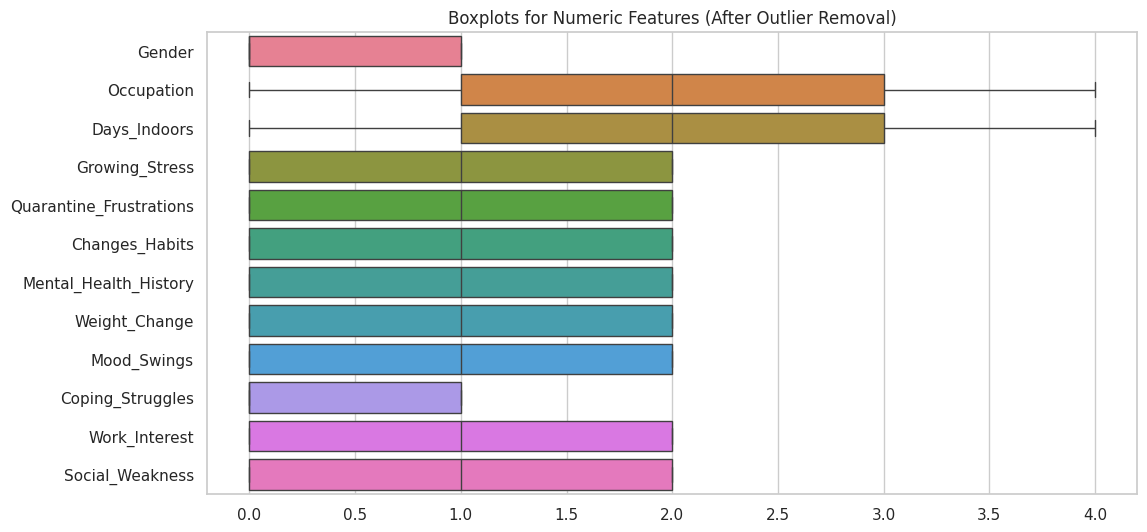

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.boxplot(data=df_no_outliers.select_dtypes(include=['float64', 'int64']), orient="h")
plt.title("Boxplots for Numeric Features (After Outlier Removal)")
plt.show()

# Logistic regression

In [ ]:
df.head()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,0,1,0,2,2,1,2,2,2,0,1,2
1,30-Above,1,3,2,2,2,0,1,1,0,0,1,2
2,30-Above,0,4,3,1,1,2,1,1,2,1,0,1
3,25-30,1,3,0,2,1,0,1,0,2,0,0,2
4,16-20,0,4,4,2,2,2,1,2,2,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(["Coping_Struggles","Age"], axis=1)
y = df["Coping_Struggles"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply L2 regularization to logistic regression
model = LogisticRegression(penalty='l2', solver='liblinear')  # 'liblinear' is a good choice for small datasets
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.48

Confusion Matrix:
[[39 46]
 [39 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.46      0.48        85
           1       0.47      0.51      0.49        80

    accuracy                           0.48       165
   macro avg       0.49      0.49      0.48       165
weighted avg       0.49      0.48      0.48       165



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
X = df.drop(["Coping_Struggles","Age"], axis=1)
y = df["Coping_Struggles"]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with logistic regression
model = Pipeline([
    ('classifier', LogisticRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.47878787878787876


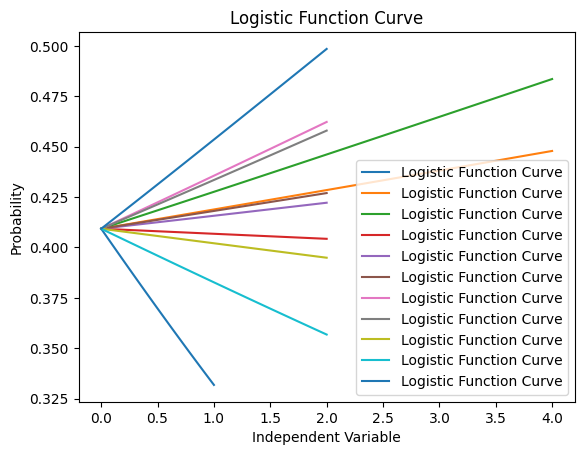

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract coefficients and intercept
coef = model.named_steps['classifier'].coef_[0]
intercept = model.named_steps['classifier'].intercept_

# Create a range of values for the independent variable
x_values = np.linspace(X.min(), X.max(), 100)

# Calculate the corresponding predicted probabilities using the logistic function
y_values = 1 / (1 + np.exp(-(coef * x_values + intercept)))

# Plot the logistic function curve
plt.plot(x_values, y_values, label='Logistic Function Curve')
plt.xlabel('Independent Variable')
plt.ylabel('Probability')
plt.title('Logistic Function Curve')
plt.show()

# SVM

Model Accuracy: 0.509090909090909
Precision: 0.49382716049382713
Recall: 0.5
F1 Score: 0.4968944099378882
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.52      0.52        85
           1       0.49      0.50      0.50        80

    accuracy                           0.51       165
   macro avg       0.51      0.51      0.51       165
weighted avg       0.51      0.51      0.51       165



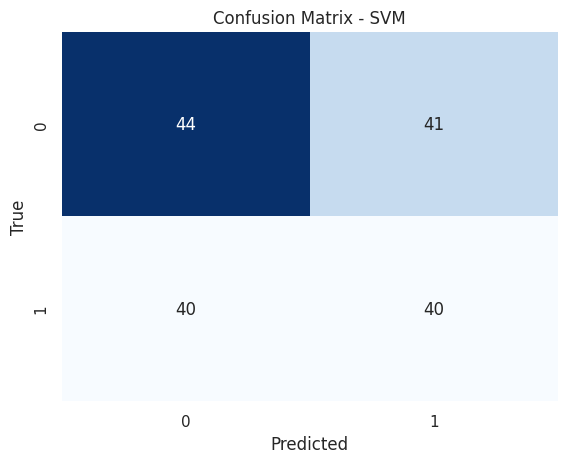

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


X = df.drop(["Coping_Struggles","Age"], axis=1)
y = df["Coping_Struggles"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with Support Vector Machines (SVM)
svm_model = Pipeline([
    ('classifier', SVC(kernel='linear'))  # You can choose different kernels (linear, rbf, etc.)
])

# Fit the SVM model
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM')
plt.show()

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Assuming your data is stored in a DataFrame called 'df'
X = df.drop(["Coping_Struggles","Age"], axis=1)
y = df["Coping_Struggles"]

# Create an SVM model
svm_model = SVC(kernel='linear')  # You can choose different kernels (linear, rbf, etc.)

# Perform cross-validation
cv_scores = cross_val_score(svm_model, X, y, cv=5)  # You can adjust the number of folds (cv) as needed

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.53333333 0.53939394 0.49090909 0.46666667 0.5304878 ]
Mean Accuracy: 0.5121581670362158


# Naive bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called 'df'
X = df.drop(["Coping_Struggles","Age"], axis=1)
y = df["Coping_Struggles"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes model (Gaussian Naive Bayes for continuous features)
nb_model = GaussianNB()

# Fit the model
nb_model.fit(X_train, y_train)

# Predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.4909090909090909


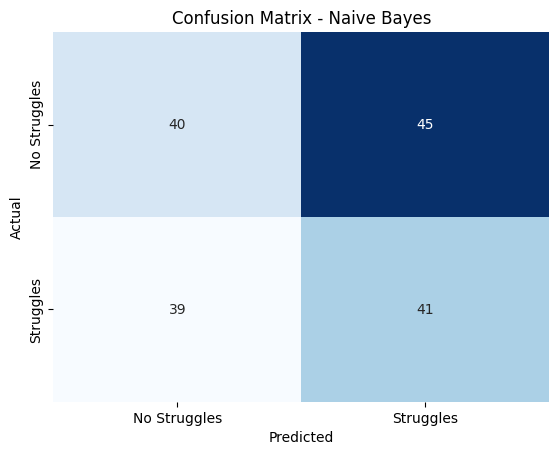

In [ ]:
# Confusion Matrix
class_names = ['No Struggles', 'Struggles']
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

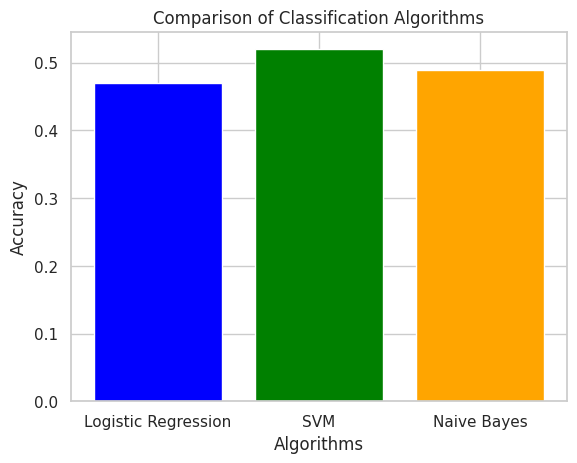

In [ ]:
import matplotlib.pyplot as plt

algorithms = ['Logistic Regression', 'SVM', 'Naive Bayes']
accuracy_scores = [0.47, 0.52, 0.49]

#bar chart
plt.bar(algorithms, accuracy_scores, color=['blue', 'green', 'orange'])

plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Algorithms')
plt.show()


##analyzing gender and cultural differences in mental health

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      824 non-null    object
 1   Gender                   824 non-null    int64 
 2   Occupation               824 non-null    int64 
 3   Days_Indoors             824 non-null    int64 
 4   Growing_Stress           824 non-null    int64 
 5   Quarantine_Frustrations  824 non-null    int64 
 6   Changes_Habits           824 non-null    int64 
 7   Mental_Health_History    824 non-null    int64 
 8   Weight_Change            824 non-null    int64 
 9   Mood_Swings              824 non-null    int64 
 10  Coping_Struggles         824 non-null    int64 
 11  Work_Interest            824 non-null    int64 
 12  Social_Weakness          824 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 83.8+ KB


In [ ]:
df

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,0,1,0,2,2,1,2,2,2,0,1,2
1,30-Above,1,3,2,2,2,0,1,1,0,0,1,2
2,30-Above,0,4,3,1,1,2,1,1,2,1,0,1
3,25-30,1,3,0,2,1,0,1,0,2,0,0,2
4,16-20,0,4,4,2,2,2,1,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,20-25,1,1,3,1,2,1,2,2,2,0,2,0
820,20-25,1,3,0,2,2,1,2,0,1,0,0,0
821,20-25,1,4,4,2,0,0,1,2,0,1,2,0
822,16-20,1,0,1,1,1,0,1,0,1,1,1,0


In [ ]:
df = df.drop('Age', axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



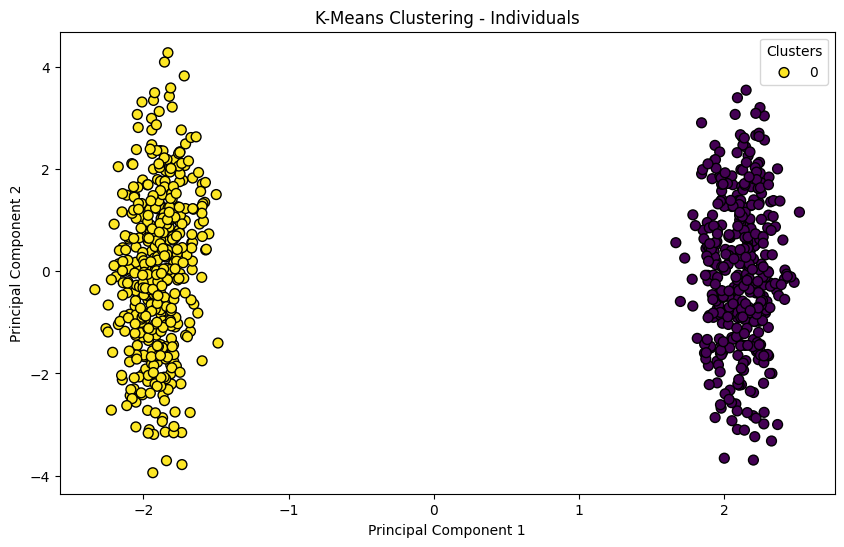

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your dataset
# Assuming your dataset is stored in a variable called 'df'
# You may need to convert the 'Age' column to numeric if it's not already
# For simplicity, let's drop the 'Age' column for this example
#df1 = df1.drop('Age', axis=1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
n_clusters = 2

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['Kmeans_Cluster'] = kmeans.fit_predict(scaled_data)

# Reduce the dimensionality for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Visualization
plt.figure(figsize=(10, 6))

# Scatter plot colored by clusters
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.title('K-Means Clustering - Individuals')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Clusters', labels=range(n_clusters))
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
features_standardized = (df1[['Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress', 'Quarantine_Frustrations', 'Changes_Habits', 'Mental_Health_History', 'Weight_Change', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness']] - df1[['Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress', 'Quarantine_Frustrations', 'Changes_Habits', 'Mental_Health_History', 'Weight_Change', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness']].mean()) / df1[[ 'Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress', 'Quarantine_Frustrations', 'Changes_Habits', 'Mental_Health_History', 'Weight_Change', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness']].std()
kmeans_silhouette = silhouette_score(features_standardized, df1['Kmeans_Cluster'])
print(f"Silhouette Score for K-means clustering: {kmeans_silhouette}")

KeyError: 'KMeans_Cluster'

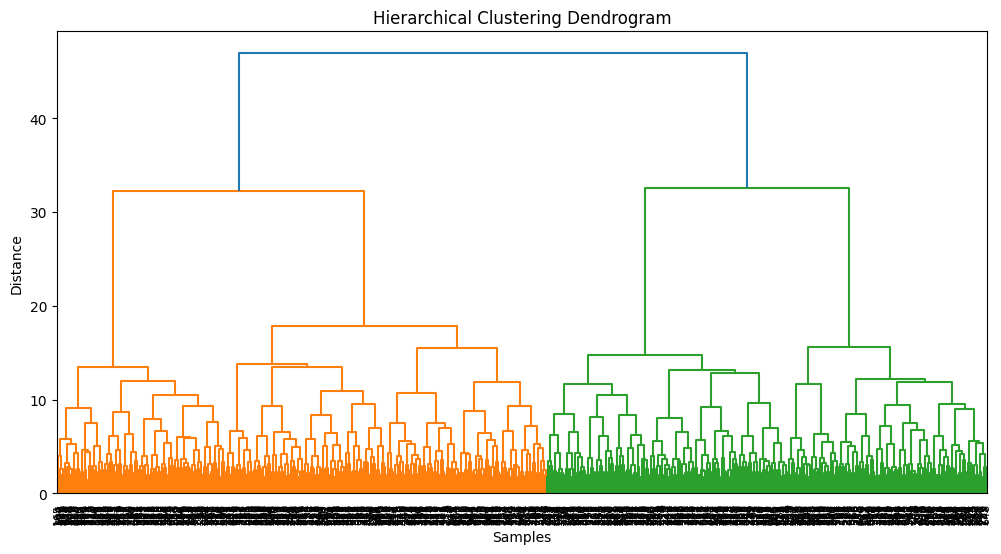

In [ ]:
import pandas as pd
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

data = df1[['Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress', 'Quarantine_Frustrations', 'Changes_Habits', 'Mental_Health_History', 'Weight_Change', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness']]

# Calculate the pairwise distances
distances = pdist(data, metric='euclidean')

# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(distances, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
print(df1[['KMeans_Cluster', 'Hierarchical_Cluster']].head(10))

KeyError: "None of [Index(['KMeans_Cluster', 'Hierarchical_Cluster'], dtype='object')] are in the [columns]"

In [ ]:
features = ['Gender', 'Days_Indoors', 'Growing_Stress', 'Quarantine_Frustrations', 'Changes_Habits', 'Mental_Health_History', 'Weight_Change', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness']

# Split data for separate analyses
female_df = df[df['Gender'] == 0]
male_df = df[df['Gender'] == 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



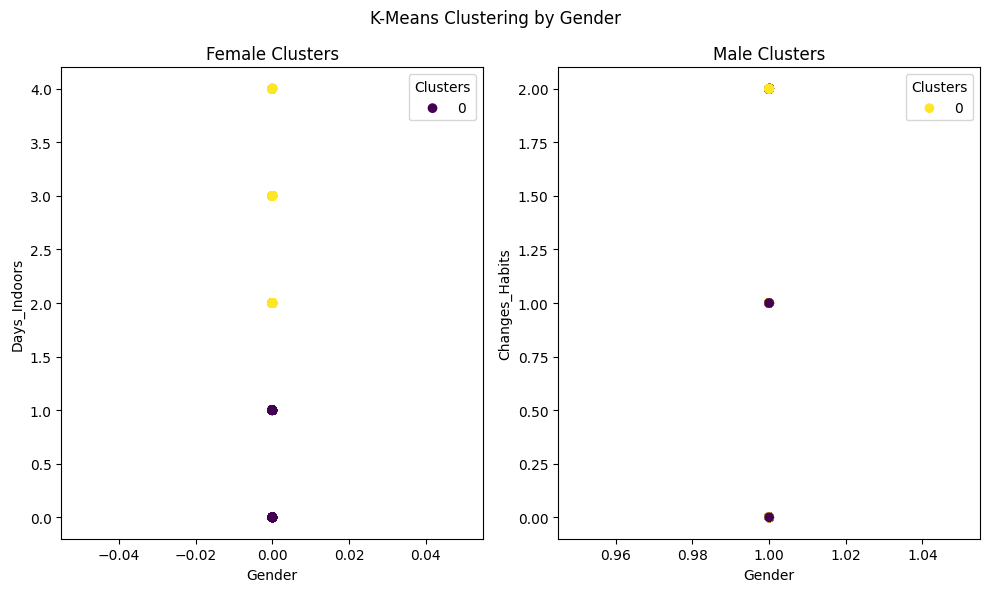

In [ ]:
# Import KMeans
from sklearn.cluster import KMeans
# Choose number of clusters
n_clusters = 2

# Fit KMeans model on female data
female_kmeans = KMeans(n_clusters=n_clusters)
female_kmeans.fit(female_df[features])

# Fit KMeans model on male data
male_kmeans = KMeans(n_clusters=n_clusters)
male_kmeans.fit(male_df[features])

import matplotlib.pyplot as plt

# Extract cluster labels for each gender
female_clusters = female_kmeans.labels_
male_clusters = male_kmeans.labels_

# Create plots for both genders
plt.figure(figsize=(10, 6))

# Plot for females
plt.subplot(121)
plt.scatter(female_df[features].iloc[:, 0], female_df[features].iloc[:, 1], c=female_clusters, cmap='viridis')
plt.title('Female Clusters')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(title='Clusters', labels=range(5))  # Add legend here

# Plot for males
plt.subplot(122)
plt.scatter(male_df[features].iloc[:, 0], male_df[features].iloc[:, 4], c=male_clusters, cmap='viridis')
plt.title('Male Clusters')
plt.xlabel(features[0])
plt.ylabel(features[4])
plt.legend(title='Clusters', labels=range(n_clusters))  # Add legend here

plt.suptitle('K-Means Clustering by Gender')
plt.tight_layout()
plt.show()


In [ ]:
pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 23.4 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=3508e2a83231e66aec1fdfd2f1d7ddb9271722b7ad988ca8fb89e2af813dca67
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [ ]:
correlation_matrix = df.corr()
collinear_variables = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            collinear_variables.add(colname)

In [ ]:
df = df.drop(collinear_variables, axis=1)

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform Factor Analysis
n_factors = 3  # Number of factors to extract
fa = FactorAnalyzer(n_factors, rotation='varimax')  # You can try different rotations
fa.fit(scaled_data)

# Get factor loadings
factor_loadings = pd.DataFrame(fa.loadings_, index=df.columns, columns=[f'Factor_{i}' for i in range(1, n_factors + 1)])
print("Factor Loadings:\n", factor_loadings)

Factor Loadings:
                          Factor_1  Factor_2  Factor_3
Gender                   0.089778  0.116544  0.989566
Occupation              -0.420015 -0.169968  0.007751
Days_Indoors            -0.333939 -0.006860 -0.012898
Growing_Stress           0.279687 -0.350804 -0.076399
Quarantine_Frustrations  0.327492 -0.093987 -0.007104
Changes_Habits          -0.096491  0.474772 -0.025051
Mental_Health_History    0.056801  0.343799  0.010119
Weight_Change           -0.165402  0.062679 -0.064520
Mood_Swings              0.167934  0.344236 -0.011286
Coping_Struggles        -0.177954  0.007256 -0.079846
Work_Interest            0.155573 -0.001003 -0.027960
Social_Weakness          0.090103 -0.049981 -0.017436
PCA1                    -0.239827  1.030170  0.182102
PCA2                     1.037294  0.198807  0.195679


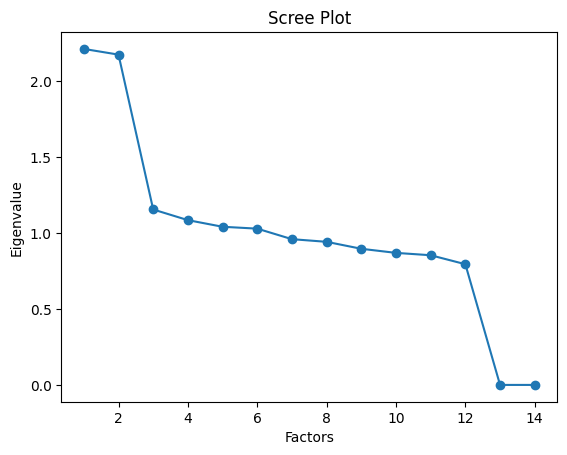

In [ ]:
ev, v = fa.get_eigenvalues()
plt.plot(range(1, len(ev) + 1), ev, marker='o')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.show()

random forest


In [ ]:
X = df.drop(['Social_Weakness'], axis=1)
y = df['Social_Weakness']

In [ ]:
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])
X['Occupation'] = label_encoder.fit_transform(X['Occupation'])
X['Days_Indoors'] = label_encoder.fit_transform(X['Days_Indoors'])
X['Growing_Stress'] = label_encoder.fit_transform(X['Growing_Stress'])
X['Quarantine_Frustrations'] = label_encoder.fit_transform(X['Quarantine_Frustrations'])
X['Changes_Habits'] = label_encoder.fit_transform(X['Changes_Habits'])
X['Mental_Health_History'] = label_encoder.fit_transform(X['Mental_Health_History'])
X['Weight_Change'] = label_encoder.fit_transform(X['Weight_Change'])
X['Mood_Swings'] = label_encoder.fit_transform(X['Mood_Swings'])
X['Coping_Struggles'] = label_encoder.fit_transform(X['Coping_Struggles'])
X['Work_Interest'] = label_encoder.fit_transform(X['Work_Interest'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.3696969696969697
Confusion Matrix:
[[29 12 13]
 [27 21 11]
 [22 19 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.54      0.44        54
           1       0.40      0.36      0.38        59
           2       0.31      0.21      0.25        52

    accuracy                           0.37       165
   macro avg       0.36      0.37      0.36       165
weighted avg       0.37      0.37      0.36       165



LSTM


In [ ]:
numeric_columns = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning:

invalid value encountered in divide



In [ ]:
sequence_length = 3

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

data = df[numeric_columns].values
target = df['Social_Weakness'].values

data_gen = TimeseriesGenerator(data, target, length=sequence_length, batch_size=1)

In [ ]:
from keras.layers import LSTM, Dense, Embedding, Dropout
from keras.models import Sequential

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, data.shape[1])))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(data_gen, epochs=10)

Epoch 1/10
821/821 [==============================] - 10s 8ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 2/10
821/821 [==============================] - 4s 5ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/10
821/821 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/10
821/821 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/10
821/821 [==============================] - 4s 4ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/10
821/821 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/10
821/821 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/10
821/821 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/10
821/821 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/10
821/821 [==============================] - 3s 3ms/step - loss: nan - accuracy:

In [ ]:
# Make predictions
# You may need to reshape your input data for making predictions
# For example, use the last 'sequence_length' rows as input
input_data = data[-sequence_length:].reshape((1, sequence_length, data.shape[1]))

In [ ]:
prediction = model.predict(input_data)
predicted_class = 1 if prediction[0, 0] > 0.5 else 0

print(f"Predicted Social Weakness class: {predicted_class}")

1/1 [==============================] - 0s 366ms/step
Predicted Social Weakness class: 0


Decision Tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.3090909090909091
Confusion Matrix:
[[17 23 14]
 [23 21 15]
 [21 18 13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.31      0.30        54
           1       0.34      0.36      0.35        59
           2       0.31      0.25      0.28        52

    accuracy                           0.31       165
   macro avg       0.31      0.31      0.31       165
weighted avg       0.31      0.31      0.31       165



# predicting depression and mental health outcomes

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.head()

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

columns_to_encode = ['Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress', 'Quarantine_Frustrations', 'Mood_Swings', 'Social_Weakness',
                     'Changes_Habits', 'Mental_Health_History', 'Weight_Change', 'Coping_Struggles', 'Work_Interest']

# Create a label encoder instance
label_encoder = LabelEncoder()

# Create a dictionary to store the mapping of labels to numeric values
label_mapping = {}

# Apply label encoding to each selected column and store the mapping
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
    label_mapping[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the label mapping
for column, mapping in label_mapping.items():
    print(f"{column} Label Mapping:")
    for label, numeric_value in mapping.items():
        print(f"  {label}: {numeric_value}")

In [ ]:
sns.boxplot(df['Days_Indoors'])


In [ ]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Calculate Z-scores for each numerical feature
z_scores = np.abs((numerical_features - numerical_features.mean()) / numerical_features.std())

# Define a threshold for considering a data point as an outlier (Z-score > 3)
outlier_threshold = 3

# Identify and filter out outliers
outliers = (z_scores > outlier_threshold).any(axis=1)
df_no_outliers = df[~outliers]

# Display the number of rows before and after removing outliers
print(f"Number of rows before removing outliers: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_no_outliers)}")

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.boxplot(data=df_no_outliers.select_dtypes(include=['float64', 'int64']), orient="h")
plt.title("Boxplots for Numeric Features (After Outlier Removal)")
plt.show()

Logistic Regrssion

In [ ]:
df.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
X = df.drop(["Coping_Struggles","Age"], axis=1)
y = df["Coping_Struggles"]